<a href="https://colab.research.google.com/github/tsilverio/Desafio1_DataScience/blob/master/Desafio%202%20Titanic%20-%20descobrindo%20os%20melhores%20valores%20para%20os%20par%C3%AAmetros%20do%20mol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Montando google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


##Importando bibliotecas

In [0]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve, auc

from matplotlib.legend_handler import HandlerLine2D

np.random.seed(0)

## Importando os arquivos

In [0]:
train_data = pd.read_csv("/content/drive/My Drive/Titanic/train.csv")


In [0]:
test_data = pd.read_csv("/content/drive/My Drive/Titanic/test.csv")


###Verificando o dataframe antes das transformações

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tamanho_nome
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,16
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,32
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,25
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,16
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,44


In [0]:
train_data["Survived"] = train_data["Survived"].astype(float) ##quando não estava conseguindo a acurácia com decimal

In [54]:
train_data['Cabin'].unique()

array([0, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       '

In [0]:
train_data.loc[[train_data['Cabin'] == 'A6'],['Cabin']]

In [0]:
train_data['Name'].str.contains("Miss")

In [0]:
train_data['Cabin'] = np.where(train_data["Cabin"].isnull(), 0, train_data['Cabin'])

In [0]:
train_data['Cabin'] = train_data['Cabin'].fillna(0)

In [90]:
train_data[train_data['Cabin'].str.contains("A", na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tamanho_nome
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000000,0,0,113788,35.5000,A6,S,28
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000000,0,0,PC 17754,34.6542,A5,C,25
174,175,0,1,"Smith, Mr. James Clinch",male,56.000000,0,0,17764,30.6958,A7,C,23
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,29.699118,0,0,113767,50.0000,A32,S,21
209,210,1,1,"Blank, Mr. Henry",male,40.000000,0,0,112277,31.0000,A31,C,16
284,285,0,1,"Smith, Mr. Richard William",male,29.699118,0,0,113056,26.0000,A19,S,26
445,446,1,1,"Dodge, Master. Washington",male,4.000000,0,2,33638,81.8583,A34,S,25
475,476,0,1,"Clifford, Mr. George Quincy",male,29.699118,0,0,110465,52.0000,A14,S,27
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.000000,1,0,11755,39.6000,A16,C,65
583,584,0,1,"Ross, Mr. John Hugo",male,36.000000,0,0,13049,40.1250,A10,C,19


In [0]:
train_data[train_data['Name'].str.contains("A")]

In [0]:
train_data.info()

##Preenchendo valores nulos, criando e transformando variáveis

In [0]:
train_data['Pclass'] = train_data['Pclass'].apply(str)
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].mean())
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
train_data['Tamanho_nome'] = train_data['Name'].apply(len)
train_data['Cabin'] = train_data['Cabin'].fillna(0)

test_data['Pclass'] = test_data['Pclass'].apply(str)
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])
test_data['Tamanho_nome'] = test_data['Name'].apply(len)
test_data['Cabin'] = test_data['Cabin'].fillna(0)


##Verificando o dataframe depois das transformações

In [99]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tamanho_nome,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,23,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,22,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,24,0,0,0,0,0,0,0


## Setando as variáveis dummies

In [0]:
variaveis = ["Pclass", "Sex", "SibSp", "Parch","Embarked"]

##Populando o X e o y de treino

In [0]:
y = train_data["Survived"]
X = pd.get_dummies(train_data[variaveis])

X['Fare'] = train_data['Fare']
X['Age'] = train_data['Age']
X['Tamanho_nome'] = train_data['Tamanho_nome']

X['Cabin_A'] = np.where(train_data['Cabin'].str.contains("A", na=False),1,0)
X['Cabin_B'] = np.where(train_data['Cabin'].str.contains("B", na=False),1,0)
X['Cabin_C'] = np.where(train_data['Cabin'].str.contains("C", na=False),1,0)
X['Cabin_D'] = np.where(train_data['Cabin'].str.contains("D", na=False),1,0)
X['Cabin_E'] = np.where(train_data['Cabin'].str.contains("E", na=False),1,0)
X['Cabin_F'] = np.where(train_data['Cabin'].str.contains("F", na=False),1,0)
X['Cabin_G'] = np.where(train_data['Cabin'].str.contains("G", na=False),1,0)

###Validando o X

In [12]:
X.head(1)

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare,Age,Tamanho_nome,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G
0,1,0,0,0,1,0,1,0,0,1,7.25,22.0,23,0,0,0,0,0,0,0


## Populando o X de teste

In [0]:
X_test = pd.get_dummies(test_data[variaveis])

X_test['Fare'] = test_data['Fare']
X_test['Age'] = test_data['Age']
X_test['Tamanho_nome'] = test_data['Tamanho_nome']

X_test['Cabin_A'] = np.where(test_data['Cabin'].str.contains("A", na=False),1,0)
X_test['Cabin_B'] = np.where(test_data['Cabin'].str.contains("B", na=False),1,0)
X_test['Cabin_C'] = np.where(test_data['Cabin'].str.contains("C", na=False),1,0)
X_test['Cabin_D'] = np.where(test_data['Cabin'].str.contains("D", na=False),1,0)
X_test['Cabin_E'] = np.where(test_data['Cabin'].str.contains("E", na=False),1,0)
X_test['Cabin_F'] = np.where(test_data['Cabin'].str.contains("F", na=False),1,0)
X_test['Cabin_G'] = np.where(test_data['Cabin'].str.contains("G", na=False),1,0)


## Separando o dataset de treino e validação

In [0]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, random_state = 0, test_size=0.25)

###Validando

In [122]:
train_X.shape

(668, 20)

In [20]:
train_y.shape

(668,)

In [21]:
valid_X.shape

(223, 13)

In [22]:
valid_y.shape

(223,)

##Rodando o modelo com dados de treino e prevendo com dados de validação

###Compara N_estimators

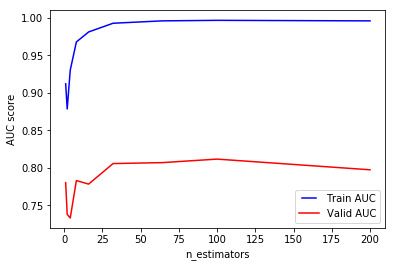

In [14]:
list_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
valid_results = []

for val_estimator in list_estimators:
  model = RandomForestClassifier(n_estimators=val_estimator, n_jobs=-1)
  model.fit(train_X, train_y)

  train_pred = model.predict(train_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)

  valid_pred = model.predict(valid_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(valid_y, valid_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  valid_results.append(roc_auc)

line1, = plt.plot(list_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(list_estimators, valid_results, 'r', label='Valid AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

###Compara max_depth

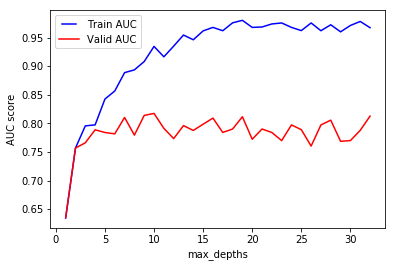

In [9]:
list_max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
valid_results = []

for val_max_depth in list_max_depths:
  model = RandomForestClassifier(max_depth=val_max_depth, n_jobs=-1)
  model.fit(train_X, train_y)

  train_pred = model.predict(train_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)

  valid_pred = model.predict(valid_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(valid_y, valid_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  valid_results.append(roc_auc)

line1, = plt.plot(list_max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(list_max_depths, valid_results, 'r', label='Valid AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depths')
plt.show()

###Compara min_samples_split

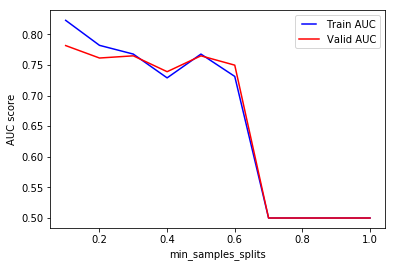

In [11]:
list_min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
valid_results = []

for val_min_samples_split in list_min_samples_splits:
  model = RandomForestClassifier(min_samples_split=val_min_samples_split, n_jobs=-1)
  model.fit(train_X, train_y)

  train_pred = model.predict(train_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)

  valid_pred = model.predict(valid_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(valid_y, valid_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  valid_results.append(roc_auc)

line1, = plt.plot(list_min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(list_min_samples_splits, valid_results, 'r', label='Valid AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_splits')
plt.show()

###min_samples_leaf

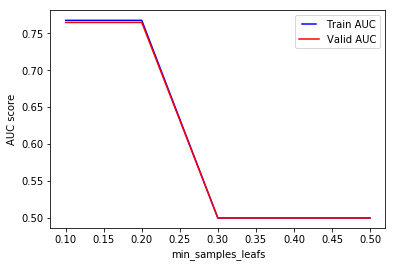

In [12]:
list_min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
valid_results = []

for val_min_samples_leaf in list_min_samples_leafs:
  model = RandomForestClassifier(min_samples_leaf=val_min_samples_leaf, n_jobs=-1)
  model.fit(train_X, train_y)

  train_pred = model.predict(train_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)

  valid_pred = model.predict(valid_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(valid_y, valid_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  valid_results.append(roc_auc)

line1, = plt.plot(list_min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(list_min_samples_leafs, valid_results, 'r', label='Valid AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leafs')
plt.show()

###max_features

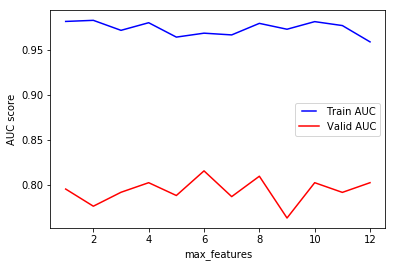

In [13]:
list_max_features = list(range(1,train_data.shape[1]))
train_results = []
valid_results = []

for val_max_feature in list_max_features:
  model = RandomForestClassifier(max_features=val_max_feature, n_jobs=-1)
  model.fit(train_X, train_y)

  train_pred = model.predict(train_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)

  valid_pred = model.predict(valid_X)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(valid_y, valid_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  valid_results.append(roc_auc)

line1, = plt.plot(list_max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(list_max_features, valid_results, 'r', label='Valid AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()

##Prevendo o modelo com dados de teste

###Rodando com os valores default e base separada

In [9]:
model = RandomForestClassifier()
model.fit(train_X, train_y)
predictions = model.predict(train_X)

np.mean(train_y == predictions)

0.9730538922155688

###Rodando com os valores default e base train inteira

In [8]:
model = RandomForestClassifier()
model.fit(X, y)
predictions = model.predict(X)

np.mean(y == predictions)

0.9753086419753086

### Rodando com a base train separada e valores corrigidos

In [16]:
model = RandomForestClassifier(n_estimators=20, max_depth=10, min_samples_split = 0.1, min_samples_leaf = 0.1, max_features = 6)
model.fit(train_X, train_y)
predictions = model.predict(train_X)

np.mean(train_y == predictions)

0.7889221556886228

### Rodando com a base train inteira  e valores corrigidos

In [8]:
model = RandomForestClassifier(n_estimators=20, max_depth=10, min_samples_split = 0.1, min_samples_leaf = 0.1, max_features = 6)
model.fit(X, y)
predictions = model.predict(X)

np.mean(y == predictions)

0.7845117845117845

###Prevendo o modelo com a base test

In [0]:
predictions = model.predict(X_test)

## Criar submission

In [0]:
sub = pd.Series(predictions, index=test_data['PassengerId'], name='Survived')
sub.to_csv("Nova submissão.csv", header=True)

In [0]:
!head -n10 "Nova submissão.csv"

head: cannot open 'Sub RandomForest.csv' for reading: No such file or directory
